In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"Social_Network_Ads.csv")

In [9]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

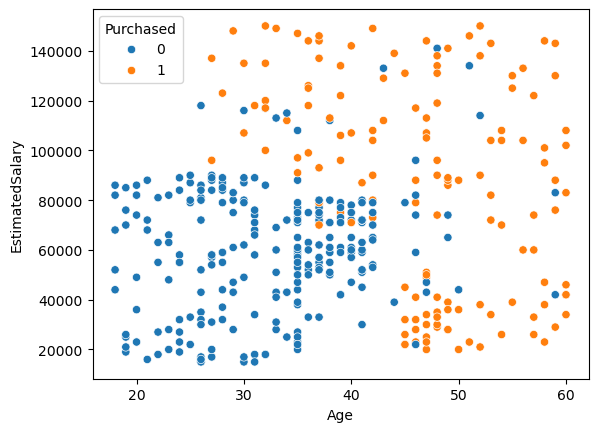

In [73]:
sns.scatterplot(x = "Age", y = "EstimatedSalary", data=df, hue="Purchased")
#if non linear data then perform Decision Tree algorithm

In [11]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
x = df.iloc[:,:-1]

In [15]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [17]:
y = df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [27]:
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [29]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [31]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)

# Gini Index

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
ds = DecisionTreeClassifier()
ds.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
ds.score(x_test, y_test)*100

88.75

In [47]:
ds.predict([[19, 19000]])

C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [49]:
from sklearn.tree import plot_tree

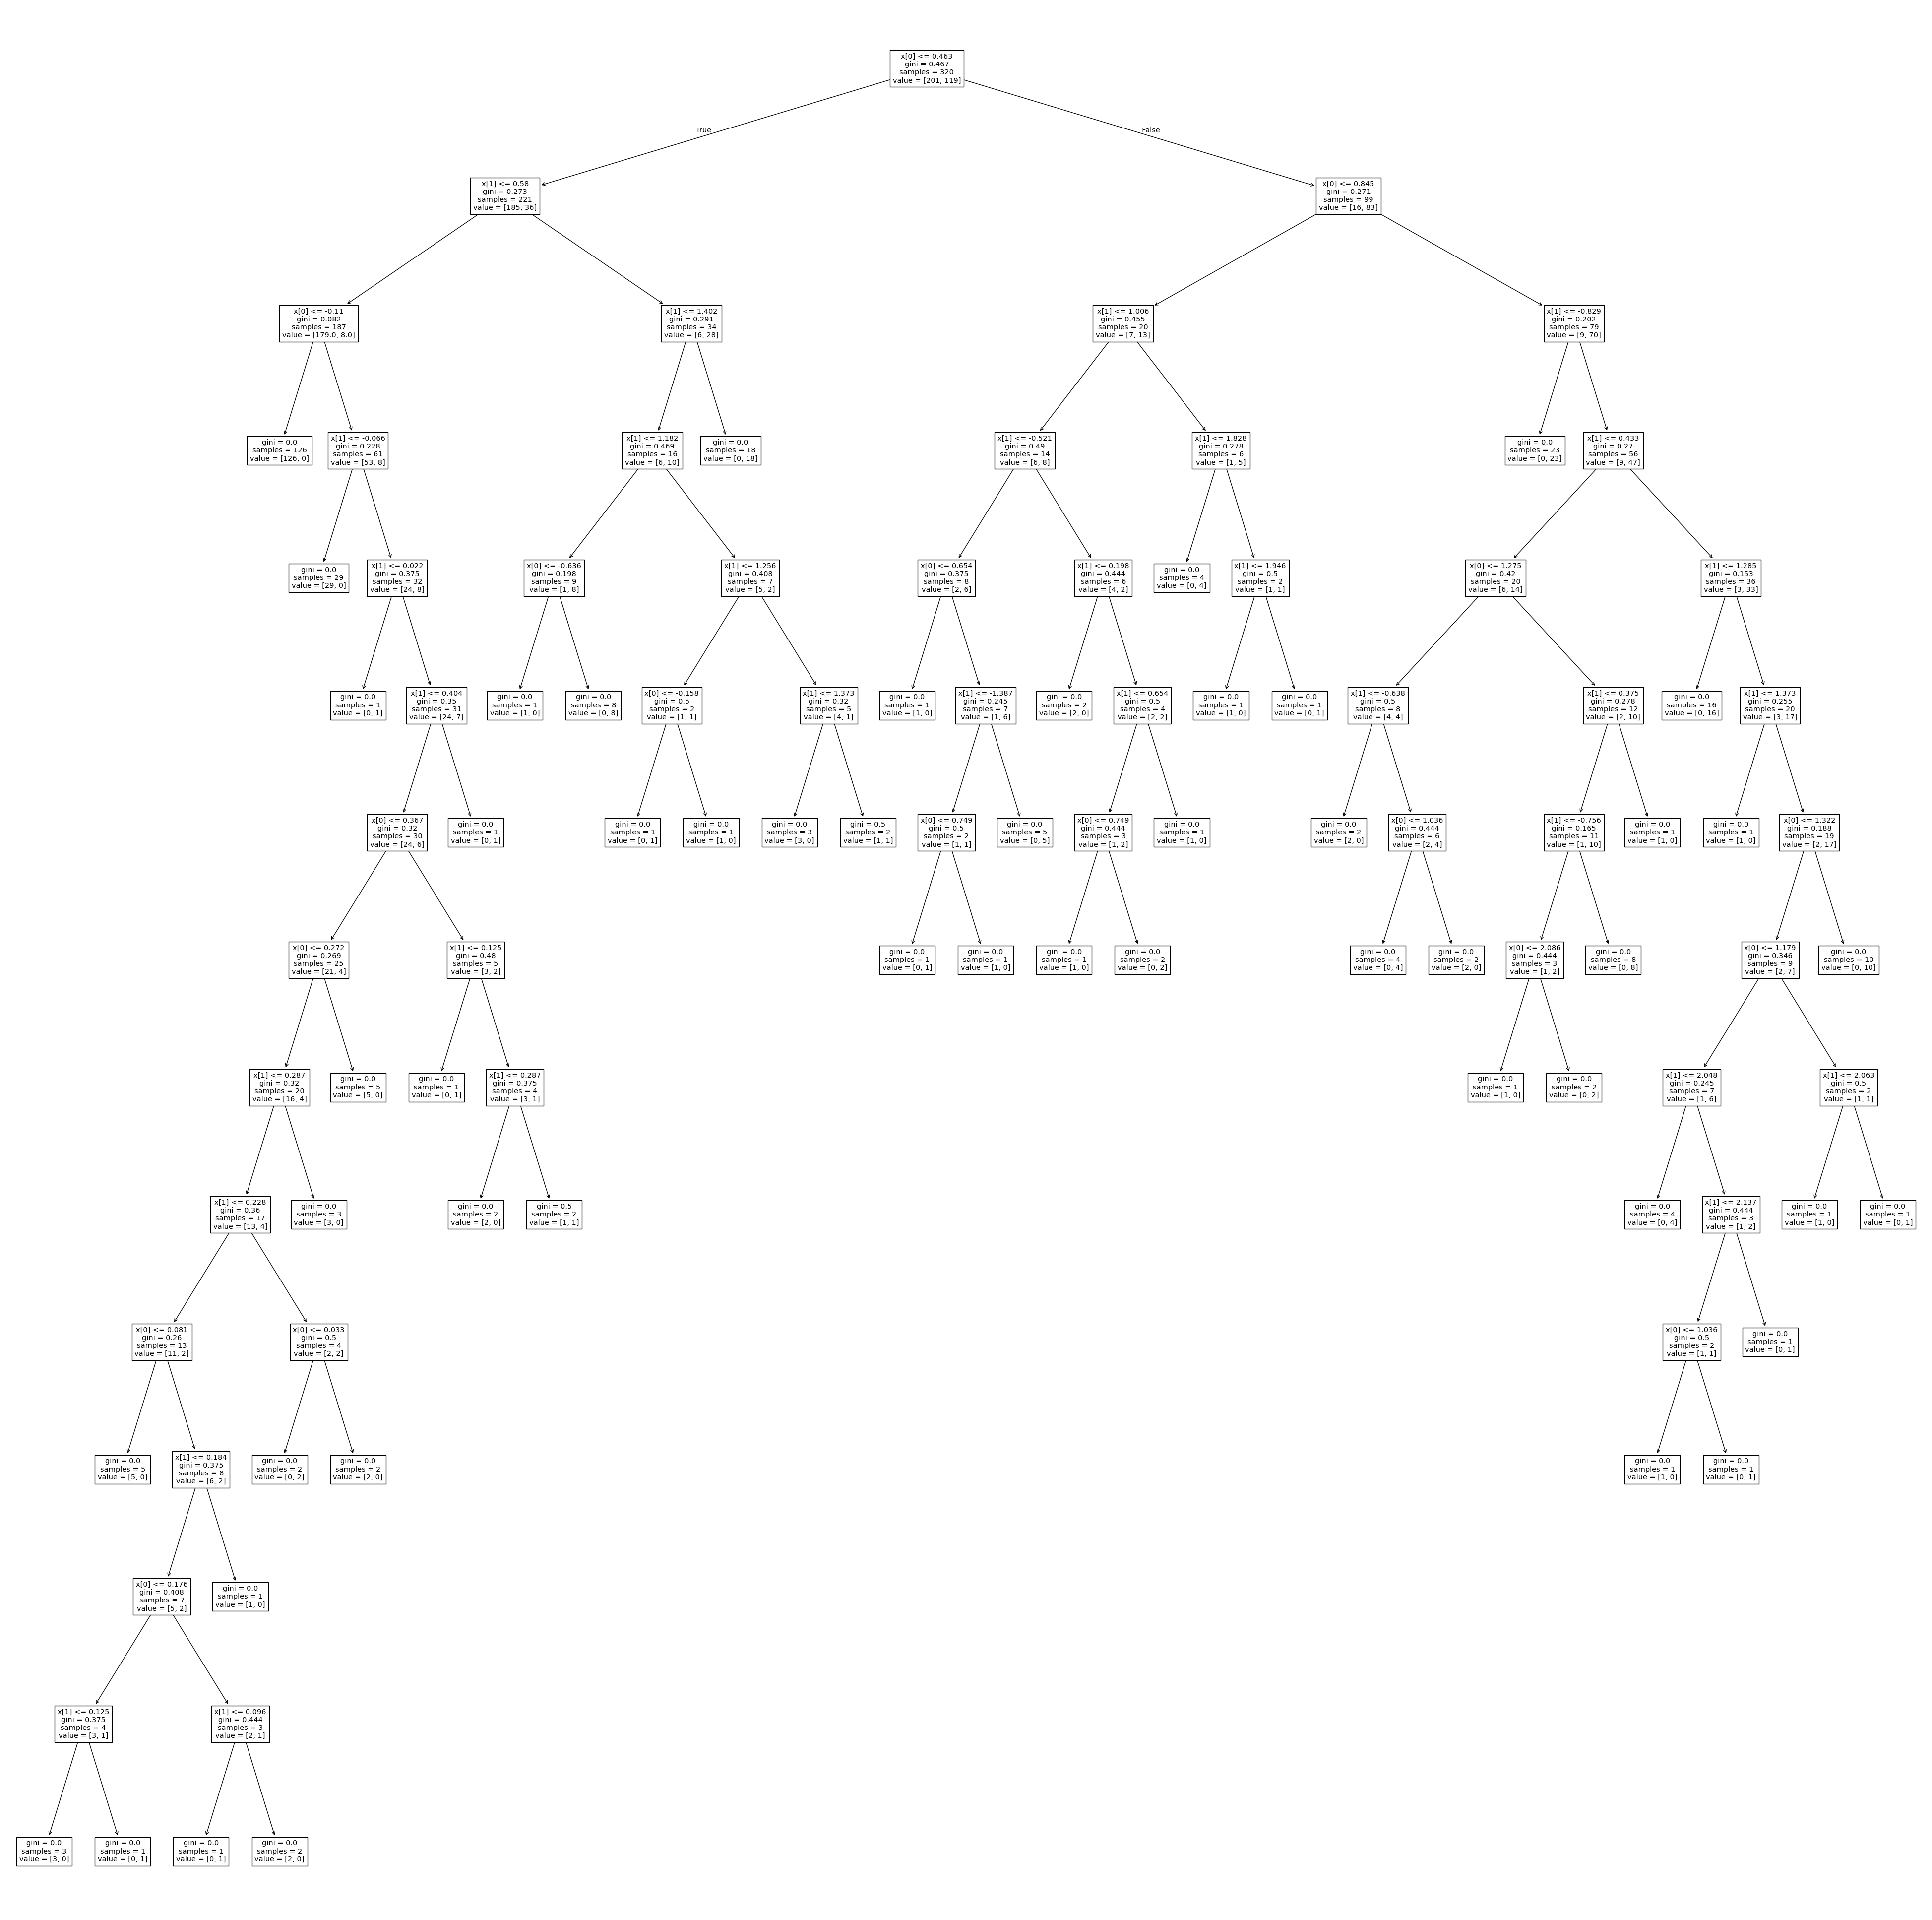

In [61]:
plt.figure(figsize=(50,50))
plot_tree(ds)
plt.savefig("Demo.jpg")
plt.show()

# Entropy

In [67]:
ds1 = DecisionTreeClassifier(criterion="entropy")
ds1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
ds1.score(x_test, y_test)*100

88.75

In [71]:
ds1.predict([[19, 19000]])

C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)